# DIABETIC RETINOPATHY

Install and Import all necessary libraries

In [2]:
!pip install numpy Pillow matplotlib opencv-python scikit-learn tensorflow

In [3]:
!pip install -U scikit-learn

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from IPython.display import Image, display, Markdown 
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix  
import seaborn as sns
from time import perf_counter
import shutil
import cv2
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.applications.resnet50 import ResNet50
from keras.utils import to_categorical

Data Preprocessing

In [5]:
from pathlib import Path
import os

imageDir = Path(r'C:\Users\KIIT\Desktop\Diabetic_Retinopathy\colored_images')

filepaths = list(imageDir.glob('**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.splitext(x)[0])[1], filepaths))

In [6]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)
image_df = image_df.sample(frac=1).reset_index(drop = True)

image_df

Filepath         Label
0     C:\Users\KIIT\Desktop\Diabetic_Retinopathy\col...  9ac2e3e9fca5
1     C:\Users\KIIT\Desktop\Diabetic_Retinopathy\col...  beb00fa6e7c9
2     C:\Users\KIIT\Desktop\Diabetic_Retinopathy\col...  6b869f37cdf3
3     C:\Users\KIIT\Desktop\Diabetic_Retinopathy\col...  dccdf750c962
4     C:\Users\KIIT\Desktop\Diabetic_Retinopathy\col...  79ce83c07588
...                                                 ...           ...
3657  C:\Users\KIIT\Desktop\Diabetic_Retinopathy\col...  8bf05909e1e1
3658  C:\Users\KIIT\Desktop\Diabetic_Retinopathy\col...  6165081b9021
3659  C:\Users\KIIT\Desktop\Diabetic_Retinopathy\col...  0423237770a7
3660  C:\Users\KIIT\Desktop\Diabetic_Retinopathy\col...  55eac26bd383
3661  C:\Users\KIIT\Desktop\Diabetic_Retinopathy\col...  0b3efe669365

[3662 rows x 2 columns]

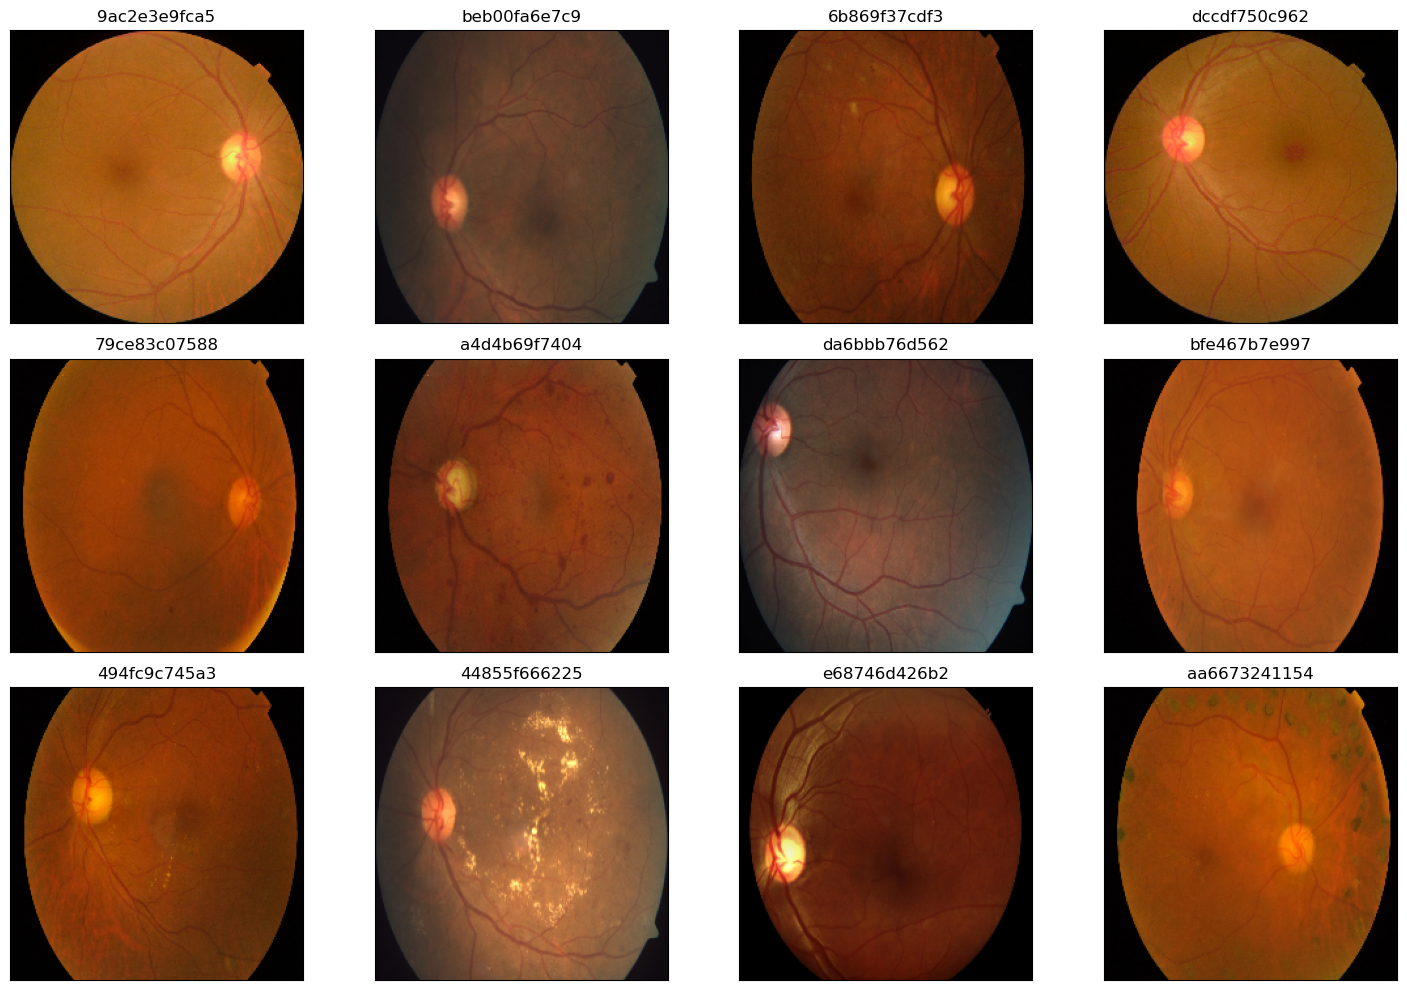

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])

plt.tight_layout()
plt.show()

In [8]:
import os
root_dir = r'C:\Users\KIIT\Desktop\Diabetic_Retinopathy\colored_images'
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir, subdir)
    if os.path.isdir(subdir_path):
        num_images = len([file_name for file_name in os.listdir(subdir_path) if file_name.endswith('.jpg') or file_name.endswith('.png')])
        print(f'{subdir}: {num_images} images')

Mild: 370 images
Moderate: 999 images
No_DR: 1805 images
Proliferate_DR: 295 images
Severe: 193 images


In [9]:
folder_path = r"C:\Users\KIIT\Desktop\Diabetic_Retinopathy\colored_images\Mild"
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]
for idx, image_file in enumerate(image_files):
    old_path = os.path.join(folder_path, image_file)
    new_path = os.path.join(folder_path, f'Mild_{idx + 1}.jpg')
    os.rename(old_path, new_path)
    print(f'Renamed "{image_file}" to "Mild_{idx + 1}.jpg"')

print('All images in "Mild" renamed to "Mild" successfully.')

Renamed "0024cdab0c1e.png" to "Mild_1.jpg"
Renamed "00cb6555d108.png" to "Mild_2.jpg"
Renamed "0124dffecf29.png" to "Mild_3.jpg"
Renamed "01b3aed3ed4c.png" to "Mild_4.jpg"
Renamed "0369f3efe69b.png" to "Mild_5.jpg"
Renamed "03e25101e8e8.png" to "Mild_6.jpg"
Renamed "04ac765f91a1.png" to "Mild_7.jpg"
Renamed "059bc89df7f4.png" to "Mild_8.jpg"
Renamed "05a5183c92d0.png" to "Mild_9.jpg"
Renamed "0684311afdfc.png" to "Mild_10.jpg"
Renamed "06b71823f9cd.png" to "Mild_11.jpg"
Renamed "07929d32b5b3.png" to "Mild_12.jpg"
Renamed "07a1c7073982.png" to "Mild_13.jpg"
Renamed "086d41d17da8.png" to "Mild_14.jpg"
Renamed "09935d72892b.png" to "Mild_15.jpg"
Renamed "0a3202889f4d.png" to "Mild_16.jpg"
Renamed "0a61bddab956.png" to "Mild_17.jpg"
Renamed "0ad7f631dedb.png" to "Mild_18.jpg"
Renamed "0d310aba6373.png" to "Mild_19.jpg"
Renamed "0dc031c94225.png" to "Mild_20.jpg"
Renamed "0dce95217626.png" to "Mild_21.jpg"
Renamed "0eb52045349f.png" to "Mild_22.jpg"
Renamed "0f495d87656a.png" to "Mild_23.jp

Renamed "b6a0e348a01e.png" to "Mild_272.jpg"
Renamed "b71428739d4e.png" to "Mild_273.jpg"
Renamed "b7278b4f2448.png" to "Mild_274.jpg"
Renamed "b8ebedd382de.png" to "Mild_275.jpg"
Renamed "b94c58d063bf.png" to "Mild_276.jpg"
Renamed "b9b99dad668d.png" to "Mild_277.jpg"
Renamed "bacfb1029f6b.png" to "Mild_278.jpg"
Renamed "bb11db08584a.png" to "Mild_279.jpg"
Renamed "bb45257258cc.png" to "Mild_280.jpg"
Renamed "bb783d8e496f.png" to "Mild_281.jpg"
Renamed "bb9a3d835a94.png" to "Mild_282.jpg"
Renamed "bc73ce76ec43.png" to "Mild_283.jpg"
Renamed "bd269a1f0e4d.png" to "Mild_284.jpg"
Renamed "bebb3f167654.png" to "Mild_285.jpg"
Renamed "bf18ff30a8f6.png" to "Mild_286.jpg"
Renamed "c027e5482e8c.png" to "Mild_287.jpg"
Renamed "c0968d41eb93.png" to "Mild_288.jpg"
Renamed "c0e15e8e2b46.png" to "Mild_289.jpg"
Renamed "c0f15fe3b4b7.png" to "Mild_290.jpg"
Renamed "c102db7634d8.png" to "Mild_291.jpg"
Renamed "c1e6fa1ad314.png" to "Mild_292.jpg"
Renamed "c1ebe785503a.png" to "Mild_293.jpg"
Renamed "c

In [10]:
folder_path = r"C:\Users\KIIT\Desktop\Diabetic_Retinopathy\colored_images\Moderate"
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]
for idx, image_file in enumerate(image_files):
    old_path = os.path.join(folder_path, image_file)
    new_path = os.path.join(folder_path, f'Moderate_{idx + 1}.jpg')
    os.rename(old_path, new_path)
    print(f'Renamed "{image_file}" to "Moderate_{idx + 1}.jpg"')

print('All images in "Moderate" renamed to "Moderate" successfully.')

Renamed "000c1434d8d7.png" to "Moderate_1.jpg"
Renamed "00a8624548a9.png" to "Moderate_2.jpg"
Renamed "00b74780d31d.png" to "Moderate_3.jpg"
Renamed "00e4ddff966a.png" to "Moderate_4.jpg"
Renamed "012a242ac6ff.png" to "Moderate_5.jpg"
Renamed "0161338f53cc.png" to "Moderate_6.jpg"
Renamed "0180bfa26c0b.png" to "Moderate_7.jpg"
Renamed "01c7808d901d.png" to "Moderate_8.jpg"
Renamed "01eb826f6467.png" to "Moderate_9.jpg"
Renamed "025a169a0bb0.png" to "Moderate_10.jpg"
Renamed "026dcd9af143.png" to "Moderate_11.jpg"
Renamed "032d7b0b4bf6.png" to "Moderate_12.jpg"
Renamed "033f2b43de6d.png" to "Moderate_13.jpg"
Renamed "03676c71ed1b.png" to "Moderate_14.jpg"
Renamed "03747397839f.png" to "Moderate_15.jpg"
Renamed "03fd50da928d.png" to "Moderate_16.jpg"
Renamed "03ff7d159f10.png" to "Moderate_17.jpg"
Renamed "0415fc68b176.png" to "Moderate_18.jpg"
Renamed "041f09eec1e8.png" to "Moderate_19.jpg"
Renamed "04a6fc58dabc.png" to "Moderate_20.jpg"
Renamed "04d029cfb612.png" to "Moderate_21.jpg"
R

Renamed "354b8911d6ed.png" to "Moderate_223.jpg"
Renamed "362c4a96cebb.png" to "Moderate_224.jpg"
Renamed "367c7049929c.png" to "Moderate_225.jpg"
Renamed "36a1e3c780a0.png" to "Moderate_226.jpg"
Renamed "36ec36c301c1.png" to "Moderate_227.jpg"
Renamed "3748349334f6.png" to "Moderate_228.jpg"
Renamed "37de05ef12a5.png" to "Moderate_229.jpg"
Renamed "38487e1a5b1f.png" to "Moderate_230.jpg"
Renamed "388f12e8df0b.png" to "Moderate_231.jpg"
Renamed "38e111cac46f.png" to "Moderate_232.jpg"
Renamed "38fe9f854046.png" to "Moderate_233.jpg"
Renamed "39134907127a.png" to "Moderate_234.jpg"
Renamed "39923b29988a.png" to "Moderate_235.jpg"
Renamed "39b5b05d6cd9.png" to "Moderate_236.jpg"
Renamed "3a122851e526.png" to "Moderate_237.jpg"
Renamed "3a1d3ce00f0c.png" to "Moderate_238.jpg"
Renamed "3a61e690f4bb.png" to "Moderate_239.jpg"
Renamed "3aa2b1ce6700.png" to "Moderate_240.jpg"
Renamed "3b58b02c89ed.png" to "Moderate_241.jpg"
Renamed "3b9c1f42c2f2.png" to "Moderate_242.jpg"
Renamed "3c1efa38d0d

Renamed "71e4130bf5c8.png" to "Moderate_461.jpg"
Renamed "7247a2c97f71.png" to "Moderate_462.jpg"
Renamed "731b19a460ad.png" to "Moderate_463.jpg"
Renamed "7350c50667c5.png" to "Moderate_464.jpg"
Renamed "7356dd08b0ae.png" to "Moderate_465.jpg"
Renamed "73e83a07a16d.png" to "Moderate_466.jpg"
Renamed "74418f620068.png" to "Moderate_467.jpg"
Renamed "7455e2b5fc57.png" to "Moderate_468.jpg"
Renamed "7550966ef777.png" to "Moderate_469.jpg"
Renamed "757572337fd0.png" to "Moderate_470.jpg"
Renamed "75a7bc945b7d.png" to "Moderate_471.jpg"
Renamed "760b6f4c6d82.png" to "Moderate_472.jpg"
Renamed "7663aba8d762.png" to "Moderate_473.jpg"
Renamed "76c0c7e1b6cb.png" to "Moderate_474.jpg"
Renamed "76cfe8967f7d.png" to "Moderate_475.jpg"
Renamed "76e6a9238570.png" to "Moderate_476.jpg"
Renamed "76fe19ff64fb.png" to "Moderate_477.jpg"
Renamed "7743f4e04a6d.png" to "Moderate_478.jpg"
Renamed "77543f66a84a.png" to "Moderate_479.jpg"
Renamed "77baa08a1345.png" to "Moderate_480.jpg"
Renamed "77e7c7a160c

Renamed "acc9f29538c4.png" to "Moderate_702.jpg"
Renamed "ad570b850a4f.png" to "Moderate_703.jpg"
Renamed "add1d681d712.png" to "Moderate_704.jpg"
Renamed "ae1344610ebe.png" to "Moderate_705.jpg"
Renamed "ae8424cdb029.png" to "Moderate_706.jpg"
Renamed "aed4e743c230.png" to "Moderate_707.jpg"
Renamed "aef9016557ca.png" to "Moderate_708.jpg"
Renamed "af828dab3ffc.png" to "Moderate_709.jpg"
Renamed "af831c158744.png" to "Moderate_710.jpg"
Renamed "af8aa32beee4.png" to "Moderate_711.jpg"
Renamed "b033ab4fb723.png" to "Moderate_712.jpg"
Renamed "b06dabab4f09.png" to "Moderate_713.jpg"
Renamed "b0cc9f8d06e4.png" to "Moderate_714.jpg"
Renamed "b0d35981708b.png" to "Moderate_715.jpg"
Renamed "b0d6417bad3e.png" to "Moderate_716.jpg"
Renamed "b0eeae01b8ab.png" to "Moderate_717.jpg"
Renamed "b13d72ceea26.png" to "Moderate_718.jpg"
Renamed "b187b3c93afb.png" to "Moderate_719.jpg"
Renamed "b1f4122fd36a.png" to "Moderate_720.jpg"
Renamed "b2748ac28fc1.png" to "Moderate_721.jpg"
Renamed "b2aaa81cc8f

In [11]:
folder_path = r"C:\Users\KIIT\Desktop\Diabetic_Retinopathy\colored_images\No_DR"
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]
for idx, image_file in enumerate(image_files):
    old_path = os.path.join(folder_path, image_file)
    new_path = os.path.join(folder_path, f'No_DR_{idx + 1}.jpg')
    os.rename(old_path, new_path)
    print(f'Renamed "{image_file}" to "No_DR_{idx + 1}.jpg"')

print('All images in "No_DR" renamed to "No_DR" successfully.')

Renamed "002c21358ce6.png" to "No_DR_1.jpg"
Renamed "005b95c28852.png" to "No_DR_2.jpg"
Renamed "0097f532ac9f.png" to "No_DR_3.jpg"
Renamed "00cc2b75cddd.png" to "No_DR_4.jpg"
Renamed "00f6c1be5a33.png" to "No_DR_5.jpg"
Renamed "0125fbd2e791.png" to "No_DR_6.jpg"
Renamed "014508ccb9cb.png" to "No_DR_7.jpg"
Renamed "0151781fe50b.png" to "No_DR_8.jpg"
Renamed "0182152c50de.png" to "No_DR_9.jpg"
Renamed "01d9477b1171.png" to "No_DR_10.jpg"
Renamed "01f7bb8be950.png" to "No_DR_11.jpg"
Renamed "0212dd31f623.png" to "No_DR_12.jpg"
Renamed "022f820027b8.png" to "No_DR_13.jpg"
Renamed "0231642cf1c2.png" to "No_DR_14.jpg"
Renamed "0232dfea7547.png" to "No_DR_15.jpg"
Renamed "02358b47ea89.png" to "No_DR_16.jpg"
Renamed "02cd34a85b24.png" to "No_DR_17.jpg"
Renamed "02da652c74b8.png" to "No_DR_18.jpg"
Renamed "0304bedad8fe.png" to "No_DR_19.jpg"
Renamed "03b373718013.png" to "No_DR_20.jpg"
Renamed "0423237770a7.png" to "No_DR_21.jpg"
Renamed "04579e31e4be.png" to "No_DR_22.jpg"
Renamed "04aef84a2c

Renamed "1f5496352859.png" to "No_DR_212.jpg"
Renamed "1f9ccda4ddf2.png" to "No_DR_213.jpg"
Renamed "1faf8664816c.png" to "No_DR_214.jpg"
Renamed "1fb455685328.png" to "No_DR_215.jpg"
Renamed "1fddd7c98fd2.png" to "No_DR_216.jpg"
Renamed "201f6e10c108.png" to "No_DR_217.jpg"
Renamed "201f882365d3.png" to "No_DR_218.jpg"
Renamed "207dd0487264.png" to "No_DR_219.jpg"
Renamed "20f86e068276.png" to "No_DR_220.jpg"
Renamed "21037f5c7790.png" to "No_DR_221.jpg"
Renamed "210bfe0127c6.png" to "No_DR_222.jpg"
Renamed "215d2b7c3fde.png" to "No_DR_223.jpg"
Renamed "218c822a3dd9.png" to "No_DR_224.jpg"
Renamed "2209daf71aab.png" to "No_DR_225.jpg"
Renamed "2221cf5c7935.png" to "No_DR_226.jpg"
Renamed "22449af52060.png" to "No_DR_227.jpg"
Renamed "224c14366e11.png" to "No_DR_228.jpg"
Renamed "226c6ceb9185.png" to "No_DR_229.jpg"
Renamed "22d843b2bbd1.png" to "No_DR_230.jpg"
Renamed "233d948e2544.png" to "No_DR_231.jpg"
Renamed "237aa50edc34.png" to "No_DR_232.jpg"
Renamed "2399d68d407f.png" to "No_

Renamed "40c24aded50c.png" to "No_DR_413.jpg"
Renamed "40dd4e6e4444.png" to "No_DR_414.jpg"
Renamed "41345cec5957.png" to "No_DR_415.jpg"
Renamed "4134b290f5f3.png" to "No_DR_416.jpg"
Renamed "4145dcb25053.png" to "No_DR_417.jpg"
Renamed "4158c340fa49.png" to "No_DR_418.jpg"
Renamed "415d5c5e785f.png" to "No_DR_419.jpg"
Renamed "415f2d2bd2a1.png" to "No_DR_420.jpg"
Renamed "41960d5f58c2.png" to "No_DR_421.jpg"
Renamed "41ab357d103f.png" to "No_DR_422.jpg"
Renamed "4205e9deb058.png" to "No_DR_423.jpg"
Renamed "4210809074c1.png" to "No_DR_424.jpg"
Renamed "4276b82e4489.png" to "No_DR_425.jpg"
Renamed "42985aa2e32f.png" to "No_DR_426.jpg"
Renamed "42af7282349b.png" to "No_DR_427.jpg"
Renamed "42b9c1977681.png" to "No_DR_428.jpg"
Renamed "42c65af5ab16.png" to "No_DR_429.jpg"
Renamed "4318b6adeb97.png" to "No_DR_430.jpg"
Renamed "4350a1b2f3cb.png" to "No_DR_431.jpg"
Renamed "435414ccccf7.png" to "No_DR_432.jpg"
Renamed "436e7a7af761.png" to "No_DR_433.jpg"
Renamed "436fa3fd145a.png" to "No_

Renamed "7a77c3eb468c.png" to "No_DR_819.jpg"
Renamed "7a9f45fdf29b.png" to "No_DR_820.jpg"
Renamed "7aabd768abff.png" to "No_DR_821.jpg"
Renamed "7ad0c4975890.png" to "No_DR_822.jpg"
Renamed "7adfb8fc0621.png" to "No_DR_823.jpg"
Renamed "7af4d8704032.png" to "No_DR_824.jpg"
Renamed "7b691d9ced34.png" to "No_DR_825.jpg"
Renamed "7b87b0015282.png" to "No_DR_826.jpg"
Renamed "7b9d519cbd66.png" to "No_DR_827.jpg"
Renamed "7ba6b23c4b46.png" to "No_DR_828.jpg"
Renamed "7bc00e58d419.png" to "No_DR_829.jpg"
Renamed "7be1b9aa78aa.png" to "No_DR_830.jpg"
Renamed "7c2e852171c0.png" to "No_DR_831.jpg"
Renamed "7c3747c0b2c3.png" to "No_DR_832.jpg"
Renamed "7c6594b50690.png" to "No_DR_833.jpg"
Renamed "7ccf9d25dc48.png" to "No_DR_834.jpg"
Renamed "7ce671f952be.png" to "No_DR_835.jpg"
Renamed "7d0a871c45db.png" to "No_DR_836.jpg"
Renamed "7d11dbc1e738.png" to "No_DR_837.jpg"
Renamed "7d48f8cdfb69.png" to "No_DR_838.jpg"
Renamed "7d94a000c2d0.png" to "No_DR_839.jpg"
Renamed "7da558d92100.png" to "No_

Renamed "94f9ecf4b8d2.png" to "No_DR_1014.jpg"
Renamed "9519a590985d.png" to "No_DR_1015.jpg"
Renamed "956765d5f46d.png" to "No_DR_1016.jpg"
Renamed "958c1fa044ba.png" to "No_DR_1017.jpg"
Renamed "959bb2d01091.png" to "No_DR_1018.jpg"
Renamed "962c0fc85e13.png" to "No_DR_1019.jpg"
Renamed "966c07831334.png" to "No_DR_1020.jpg"
Renamed "96793edb1003.png" to "No_DR_1021.jpg"
Renamed "9688c6ef5dc5.png" to "No_DR_1022.jpg"
Renamed "969f92a390db.png" to "No_DR_1023.jpg"
Renamed "96b5474ae604.png" to "No_DR_1024.jpg"
Renamed "96c699221180.png" to "No_DR_1025.jpg"
Renamed "96ce10a1dbd7.png" to "No_DR_1026.jpg"
Renamed "96ea316ed0ab.png" to "No_DR_1027.jpg"
Renamed "971bb98ab935.png" to "No_DR_1028.jpg"
Renamed "973b0facfa9b.png" to "No_DR_1029.jpg"
Renamed "974c7d7b9c64.png" to "No_DR_1030.jpg"
Renamed "976082127e2a.png" to "No_DR_1031.jpg"
Renamed "97a235367f9d.png" to "No_DR_1032.jpg"
Renamed "97c6cb55866d.png" to "No_DR_1033.jpg"
Renamed "97d02a9b94f7.png" to "No_DR_1034.jpg"
Renamed "97f2

Renamed "b0f8613305a3.png" to "No_DR_1245.jpg"
Renamed "b10fca20c885.png" to "No_DR_1246.jpg"
Renamed "b11dcdcbc8c8.png" to "No_DR_1247.jpg"
Renamed "b16dd4483ca5.png" to "No_DR_1248.jpg"
Renamed "b1c6f0997e27.png" to "No_DR_1249.jpg"
Renamed "b200c23b299b.png" to "No_DR_1250.jpg"
Renamed "b21abe5d9722.png" to "No_DR_1251.jpg"
Renamed "b22cc1bf0b8a.png" to "No_DR_1252.jpg"
Renamed "b294927b14b0.png" to "No_DR_1253.jpg"
Renamed "b2b79b37d314.png" to "No_DR_1254.jpg"
Renamed "b2b7ccd34cbd.png" to "No_DR_1255.jpg"
Renamed "b351ae99413a.png" to "No_DR_1256.jpg"
Renamed "b35cad8fe2d7.png" to "No_DR_1257.jpg"
Renamed "b3a994760537.png" to "No_DR_1258.jpg"
Renamed "b3f31c371e59.png" to "No_DR_1259.jpg"
Renamed "b43440c6ebe4.png" to "No_DR_1260.jpg"
Renamed "b460ca9fa26f.png" to "No_DR_1261.jpg"
Renamed "b46b09a45f39.png" to "No_DR_1262.jpg"
Renamed "b4b04d81acbb.png" to "No_DR_1263.jpg"
Renamed "b4e15102cd7a.png" to "No_DR_1264.jpg"
Renamed "b5204c0decc7.png" to "No_DR_1265.jpg"
Renamed "b532

Renamed "cd48cfab4e44.png" to "No_DR_1432.jpg"
Renamed "cd563556cb57.png" to "No_DR_1433.jpg"
Renamed "cd66754e1b3b.png" to "No_DR_1434.jpg"
Renamed "cd8da43e3069.png" to "No_DR_1435.jpg"
Renamed "cd941e5bc659.png" to "No_DR_1436.jpg"
Renamed "ce6f33a81ad5.png" to "No_DR_1437.jpg"
Renamed "ce754234d760.png" to "No_DR_1438.jpg"
Renamed "ce8d2efd9d4f.png" to "No_DR_1439.jpg"
Renamed "ceb32a193eff.png" to "No_DR_1440.jpg"
Renamed "cec299c2a2d5.png" to "No_DR_1441.jpg"
Renamed "cf6551521a35.png" to "No_DR_1442.jpg"
Renamed "cf8ae5501bd6.png" to "No_DR_1443.jpg"
Renamed "cf8f1bc7a215.png" to "No_DR_1444.jpg"
Renamed "cfb17a7cc8d4.png" to "No_DR_1445.jpg"
Renamed "cfdbaef73a8b.png" to "No_DR_1446.jpg"
Renamed "cfed7c1172ec.png" to "No_DR_1447.jpg"
Renamed "cff262ed8f4c.png" to "No_DR_1448.jpg"
Renamed "cffc50047828.png" to "No_DR_1449.jpg"
Renamed "d02b79fc3200.png" to "No_DR_1450.jpg"
Renamed "d0926ed2c8e5.png" to "No_DR_1451.jpg"
Renamed "d160ebef4117.png" to "No_DR_1452.jpg"
Renamed "d16e

Renamed "e529c5757d64.png" to "No_DR_1610.jpg"
Renamed "e582e56e7942.png" to "No_DR_1611.jpg"
Renamed "e594c19e2e1d.png" to "No_DR_1612.jpg"
Renamed "e59c5f345bb0.png" to "No_DR_1613.jpg"
Renamed "e5de79795c1d.png" to "No_DR_1614.jpg"
Renamed "e5f332efcbc7.png" to "No_DR_1615.jpg"
Renamed "e5f73f2855c0.png" to "No_DR_1616.jpg"
Renamed "e60e4edb3ca9.png" to "No_DR_1617.jpg"
Renamed "e632e38fd2d4.png" to "No_DR_1618.jpg"
Renamed "e6552b7432b3.png" to "No_DR_1619.jpg"
Renamed "e66855a5c583.png" to "No_DR_1620.jpg"
Renamed "e66ad813a508.png" to "No_DR_1621.jpg"
Renamed "e68746d426b2.png" to "No_DR_1622.jpg"
Renamed "e68bdd36e589.png" to "No_DR_1623.jpg"
Renamed "e69b48516577.png" to "No_DR_1624.jpg"
Renamed "e6a5e4718873.png" to "No_DR_1625.jpg"
Renamed "e7291472109b.png" to "No_DR_1626.jpg"
Renamed "e7578d8dba72.png" to "No_DR_1627.jpg"
Renamed "e77a93c3d9a9.png" to "No_DR_1628.jpg"
Renamed "e79e10907295.png" to "No_DR_1629.jpg"
Renamed "e7b5dd5bab1f.png" to "No_DR_1630.jpg"
Renamed "e81f

Renamed "ff59d44a70a7.png" to "No_DR_1802.jpg"
Renamed "ff631653374e.png" to "No_DR_1803.jpg"
Renamed "ffc04fed30e6.png" to "No_DR_1804.jpg"
Renamed "ffd97f8cd5aa.png" to "No_DR_1805.jpg"
All images in "No_DR" renamed to "No_DR" successfully.


In [12]:
folder_path = r"C:\Users\KIIT\Desktop\Diabetic_Retinopathy\colored_images\Proliferate_DR"
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]
for idx, image_file in enumerate(image_files):
    old_path = os.path.join(folder_path, image_file)
    new_path = os.path.join(folder_path, f'Proliferate_DR_{idx + 1}.jpg')
    os.rename(old_path, new_path)
    print(f'Renamed "{image_file}" to "Proliferate_DR_{idx + 1}.jpg"')

print('All images in "Proliferate_DR" renamed to "Proliferate_DR" successfully.')


Renamed "001639a390f0.png" to "Proliferate_DR_1.jpg"
Renamed "0083ee8054ee.png" to "Proliferate_DR_2.jpg"
Renamed "0243404e8a00.png" to "Proliferate_DR_3.jpg"
Renamed "02685f13cefd.png" to "Proliferate_DR_4.jpg"
Renamed "02dda30d3acf.png" to "Proliferate_DR_5.jpg"
Renamed "0318598cfd16.png" to "Proliferate_DR_6.jpg"
Renamed "034cb07a550f.png" to "Proliferate_DR_7.jpg"
Renamed "03a7f4a5786f.png" to "Proliferate_DR_8.jpg"
Renamed "07122e268a1d.png" to "Proliferate_DR_9.jpg"
Renamed "080ee76c958c.png" to "Proliferate_DR_10.jpg"
Renamed "080f66eedfb9.png" to "Proliferate_DR_11.jpg"
Renamed "08a3875063c3.png" to "Proliferate_DR_12.jpg"
Renamed "0981195eb9fb.png" to "Proliferate_DR_13.jpg"
Renamed "0ada12c0e78f.png" to "Proliferate_DR_14.jpg"
Renamed "0bf37ca3156a.png" to "Proliferate_DR_15.jpg"
Renamed "0ceb222f6629.png" to "Proliferate_DR_16.jpg"
Renamed "0e0fc1d9810c.png" to "Proliferate_DR_17.jpg"
Renamed "0e82bcacc475.png" to "Proliferate_DR_18.jpg"
Renamed "10fca1abf338.png" to "Prolif

Renamed "f0098e9d4aee.png" to "Proliferate_DR_277.jpg"
Renamed "f025f33b2c9b.png" to "Proliferate_DR_278.jpg"
Renamed "f03d3c4ce7fb.png" to "Proliferate_DR_279.jpg"
Renamed "f0f89314e860.png" to "Proliferate_DR_280.jpg"
Renamed "f1dc26c4bfa3.png" to "Proliferate_DR_281.jpg"
Renamed "f2d2a0c92034.png" to "Proliferate_DR_282.jpg"
Renamed "f549294e12e1.png" to "Proliferate_DR_283.jpg"
Renamed "f58d37d48e42.png" to "Proliferate_DR_284.jpg"
Renamed "f5e6226bd2e0.png" to "Proliferate_DR_285.jpg"
Renamed "f69835dc7c50.png" to "Proliferate_DR_286.jpg"
Renamed "f6f3ea0d2693.png" to "Proliferate_DR_287.jpg"
Renamed "f72adcac5638.png" to "Proliferate_DR_288.jpg"
Renamed "f850cb51fdba.png" to "Proliferate_DR_289.jpg"
Renamed "f8cf7ed8ef00.png" to "Proliferate_DR_290.jpg"
Renamed "fa59221cf464.png" to "Proliferate_DR_291.jpg"
Renamed "fb696a8e055a.png" to "Proliferate_DR_292.jpg"
Renamed "fce93caa4758.png" to "Proliferate_DR_293.jpg"
Renamed "fdd534271f3d.png" to "Proliferate_DR_294.jpg"
Renamed "f

In [13]:
folder_path = r"C:\Users\KIIT\Desktop\Diabetic_Retinopathy\colored_images\Severe"
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]
for idx, image_file in enumerate(image_files):
    old_path = os.path.join(folder_path, image_file)
    new_path = os.path.join(folder_path, f'Severe_{idx + 1}.jpg')
    os.rename(old_path, new_path)
    print(f'Renamed "{image_file}" to "Severe_{idx + 1}.jpg"')

print('All images in "Severe" renamed to "Severe" successfully.')

Renamed "0104b032c141.png" to "Severe_1.jpg"
Renamed "03c85870824c.png" to "Severe_2.jpg"
Renamed "042470a92154.png" to "Severe_3.jpg"
Renamed "05cd0178ccfe.png" to "Severe_4.jpg"
Renamed "069f43616fab.png" to "Severe_5.jpg"
Renamed "070f67572d03.png" to "Severe_6.jpg"
Renamed "07a0e34c8d20.png" to "Severe_7.jpg"
Renamed "093a42649c29.png" to "Severe_8.jpg"
Renamed "0c917c372572.png" to "Severe_9.jpg"
Renamed "0cb14014117d.png" to "Severe_10.jpg"
Renamed "0dc8d25b3f69.png" to "Severe_11.jpg"
Renamed "0edadb2aa127.png" to "Severe_12.jpg"
Renamed "0f882877bf13.png" to "Severe_13.jpg"
Renamed "0f96c358a250.png" to "Severe_14.jpg"
Renamed "14e3f84445f7.png" to "Severe_15.jpg"
Renamed "15bed5adde74.png" to "Severe_16.jpg"
Renamed "15f440753916.png" to "Severe_17.jpg"
Renamed "1623e8e3adc4.png" to "Severe_18.jpg"
Renamed "166068a24416.png" to "Severe_19.jpg"
Renamed "191a711852bd.png" to "Severe_20.jpg"
Renamed "19244004583f.png" to "Severe_21.jpg"
Renamed "1ab3f1c71a5f.png" to "Severe_22.jp

In [14]:
import os
root_dir = r'C:\Users\KIIT\Desktop\Diabetic_Retinopathy\colored_images'
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir, subdir)
    if os.path.isdir(subdir_path):
        num_images = len([file_name for file_name in os.listdir(subdir_path) if file_name.endswith('.jpg') or file_name.endswith('.png')])
        print(f'{subdir}: {num_images} images')

Mild: 370 images
Moderate: 999 images
No_DR: 1805 images
Proliferate_DR: 295 images
Severe: 193 images


In [15]:
imageDir = Path(r'C:\Users\KIIT\Desktop\Diabetic_Retinopathy\colored_images')

filepaths = list(imageDir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [16]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)
image_df = image_df.sample(frac=1).reset_index(drop = True)

image_df

Filepath           Label
0     C:\Users\KIIT\Desktop\Diabetic_Retinopathy\col...        Moderate
1     C:\Users\KIIT\Desktop\Diabetic_Retinopathy\col...           No_DR
2     C:\Users\KIIT\Desktop\Diabetic_Retinopathy\col...        Moderate
3     C:\Users\KIIT\Desktop\Diabetic_Retinopathy\col...          Severe
4     C:\Users\KIIT\Desktop\Diabetic_Retinopathy\col...        Moderate
...                                                 ...             ...
3657  C:\Users\KIIT\Desktop\Diabetic_Retinopathy\col...           No_DR
3658  C:\Users\KIIT\Desktop\Diabetic_Retinopathy\col...           No_DR
3659  C:\Users\KIIT\Desktop\Diabetic_Retinopathy\col...  Proliferate_DR
3660  C:\Users\KIIT\Desktop\Diabetic_Retinopathy\col...           No_DR
3661  C:\Users\KIIT\Desktop\Diabetic_Retinopathy\col...           No_DR

[3662 rows x 2 columns]

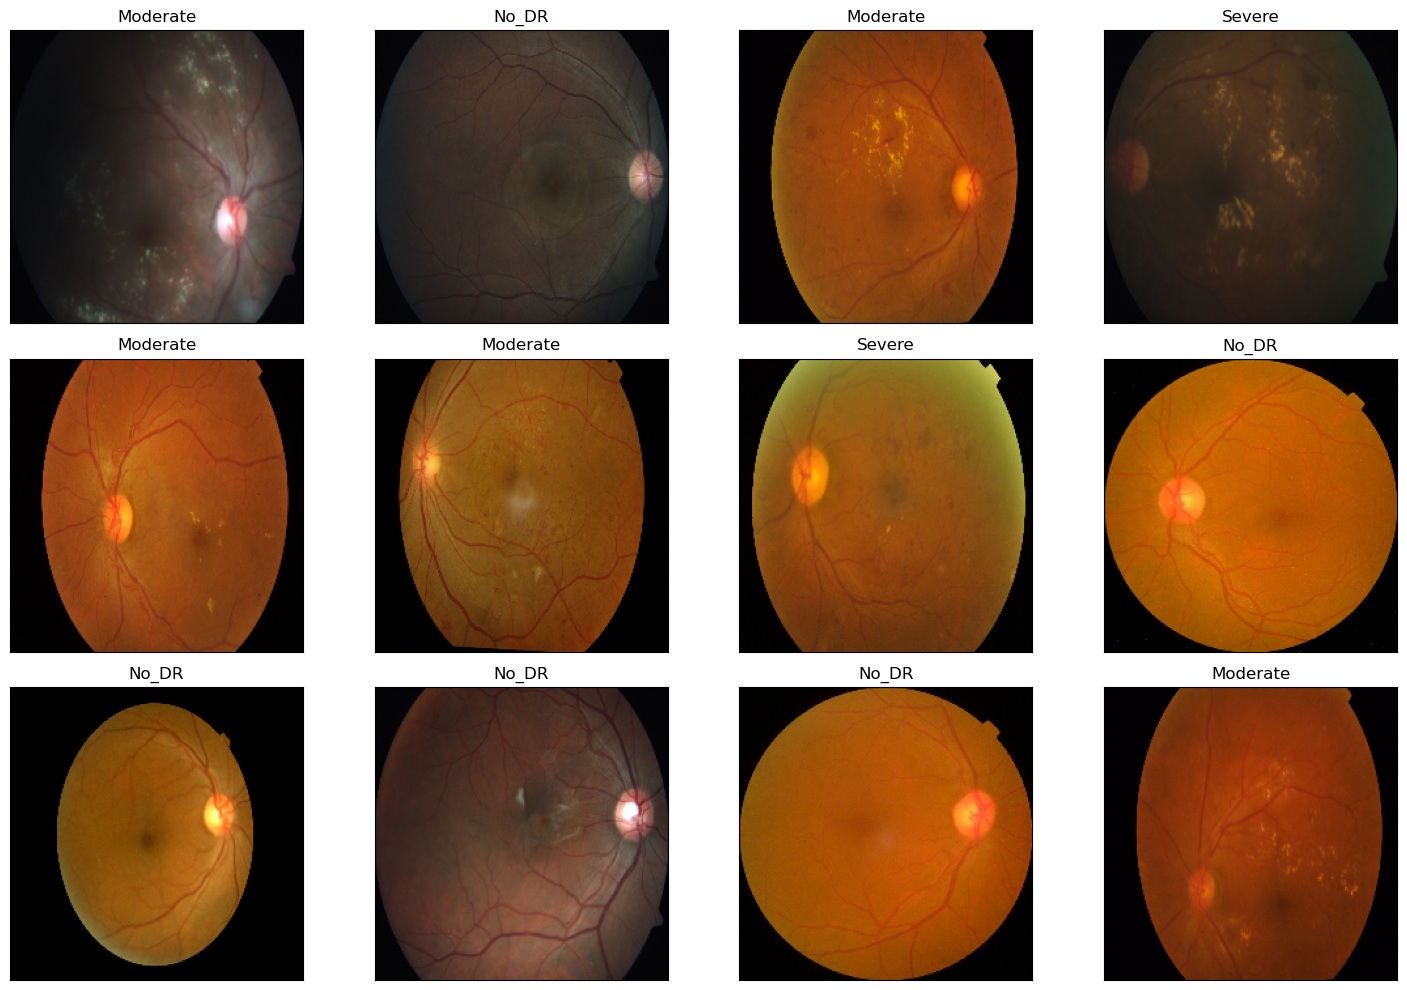

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])

plt.tight_layout()
plt.show()

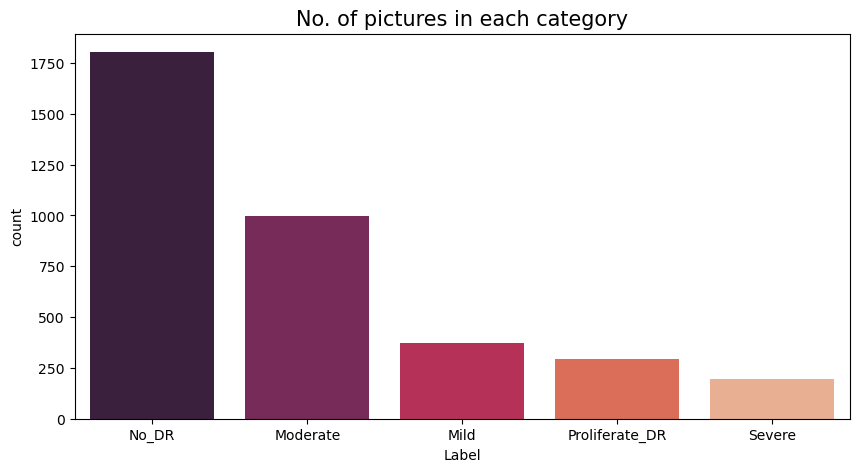

In [18]:
vc = image_df['Label'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=vc.index, y=vc, palette="rocket")
plt.title("No. of pictures in each category", fontsize=15)
plt.show()

In [19]:
import os
import shutil

source_folders = [
    r"C:\Users\KIIT\Desktop\Diabetic_Retinopathy\colored_images\Mild",
    r"C:\Users\KIIT\Desktop\Diabetic_Retinopathy\colored_images\Moderate",
    r"C:\Users\KIIT\Desktop\Diabetic_Retinopathy\colored_images\Proliferate_DR",
    r"C:\Users\KIIT\Desktop\Diabetic_Retinopathy\colored_images\Severe"
]
destination_folder = r"C:\Users\KIIT\Desktop\Diabetic_Retinopathy\colored_images\DR"
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)
for folder in source_folders:
    files = os.listdir(folder)
    for file_name in files:
        source_file = os.path.join(folder, file_name)
        destination_file = os.path.join(destination_folder, file_name)
        shutil.copyfile(source_file, destination_file)
print("Images merged successfully!")

Images merged successfully!


In [20]:
import os
root_dir = r'C:\Users\KIIT\Desktop\Diabetic_Retinopathy\colored_images'
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir, subdir)
    if os.path.isdir(subdir_path):
        num_images = len([file_name for file_name in os.listdir(subdir_path) if file_name.endswith('.jpg') or file_name.endswith('.png')])
        print(f'{subdir}: {num_images} images')

DR: 1857 images
Mild: 370 images
Moderate: 999 images
No_DR: 1805 images
Proliferate_DR: 295 images
Severe: 193 images


In [21]:
import os
folder_path = r"C:\Users\KIIT\Desktop\Diabetic_Retinopathy\colored_images\DR"
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]
for idx, image_file in enumerate(image_files):
    old_path = os.path.join(folder_path, image_file)
    new_path = os.path.join(folder_path, f'DR_{idx + 1}.jpg')
    os.rename(old_path, new_path)
    print(f'Renamed "{image_file}" to "DR_{idx + 1}.jpg"')
print('All images renamed to "DR" successfully.')

Renamed "Mild_1.jpg" to "DR_1.jpg"
Renamed "Mild_10.jpg" to "DR_2.jpg"
Renamed "Mild_100.jpg" to "DR_3.jpg"
Renamed "Mild_101.jpg" to "DR_4.jpg"
Renamed "Mild_102.jpg" to "DR_5.jpg"
Renamed "Mild_103.jpg" to "DR_6.jpg"
Renamed "Mild_104.jpg" to "DR_7.jpg"
Renamed "Mild_105.jpg" to "DR_8.jpg"
Renamed "Mild_106.jpg" to "DR_9.jpg"
Renamed "Mild_107.jpg" to "DR_10.jpg"
Renamed "Mild_108.jpg" to "DR_11.jpg"
Renamed "Mild_109.jpg" to "DR_12.jpg"
Renamed "Mild_11.jpg" to "DR_13.jpg"
Renamed "Mild_110.jpg" to "DR_14.jpg"
Renamed "Mild_111.jpg" to "DR_15.jpg"
Renamed "Mild_112.jpg" to "DR_16.jpg"
Renamed "Mild_113.jpg" to "DR_17.jpg"
Renamed "Mild_114.jpg" to "DR_18.jpg"
Renamed "Mild_115.jpg" to "DR_19.jpg"
Renamed "Mild_116.jpg" to "DR_20.jpg"
Renamed "Mild_117.jpg" to "DR_21.jpg"
Renamed "Mild_118.jpg" to "DR_22.jpg"
Renamed "Mild_119.jpg" to "DR_23.jpg"
Renamed "Mild_12.jpg" to "DR_24.jpg"
Renamed "Mild_120.jpg" to "DR_25.jpg"
Renamed "Mild_121.jpg" to "DR_26.jpg"
Renamed "Mild_122.jpg" to 

Renamed "Moderate_160.jpg" to "DR_439.jpg"
Renamed "Moderate_161.jpg" to "DR_440.jpg"
Renamed "Moderate_162.jpg" to "DR_441.jpg"
Renamed "Moderate_163.jpg" to "DR_442.jpg"
Renamed "Moderate_164.jpg" to "DR_443.jpg"
Renamed "Moderate_165.jpg" to "DR_444.jpg"
Renamed "Moderate_166.jpg" to "DR_445.jpg"
Renamed "Moderate_167.jpg" to "DR_446.jpg"
Renamed "Moderate_168.jpg" to "DR_447.jpg"
Renamed "Moderate_169.jpg" to "DR_448.jpg"
Renamed "Moderate_17.jpg" to "DR_449.jpg"
Renamed "Moderate_170.jpg" to "DR_450.jpg"
Renamed "Moderate_171.jpg" to "DR_451.jpg"
Renamed "Moderate_172.jpg" to "DR_452.jpg"
Renamed "Moderate_173.jpg" to "DR_453.jpg"
Renamed "Moderate_174.jpg" to "DR_454.jpg"
Renamed "Moderate_175.jpg" to "DR_455.jpg"
Renamed "Moderate_176.jpg" to "DR_456.jpg"
Renamed "Moderate_177.jpg" to "DR_457.jpg"
Renamed "Moderate_178.jpg" to "DR_458.jpg"
Renamed "Moderate_179.jpg" to "DR_459.jpg"
Renamed "Moderate_18.jpg" to "DR_460.jpg"
Renamed "Moderate_180.jpg" to "DR_461.jpg"
Renamed "Mode

Renamed "Moderate_48.jpg" to "DR_793.jpg"
Renamed "Moderate_480.jpg" to "DR_794.jpg"
Renamed "Moderate_481.jpg" to "DR_795.jpg"
Renamed "Moderate_482.jpg" to "DR_796.jpg"
Renamed "Moderate_483.jpg" to "DR_797.jpg"
Renamed "Moderate_484.jpg" to "DR_798.jpg"
Renamed "Moderate_485.jpg" to "DR_799.jpg"
Renamed "Moderate_486.jpg" to "DR_800.jpg"
Renamed "Moderate_487.jpg" to "DR_801.jpg"
Renamed "Moderate_488.jpg" to "DR_802.jpg"
Renamed "Moderate_489.jpg" to "DR_803.jpg"
Renamed "Moderate_49.jpg" to "DR_804.jpg"
Renamed "Moderate_490.jpg" to "DR_805.jpg"
Renamed "Moderate_491.jpg" to "DR_806.jpg"
Renamed "Moderate_492.jpg" to "DR_807.jpg"
Renamed "Moderate_493.jpg" to "DR_808.jpg"
Renamed "Moderate_494.jpg" to "DR_809.jpg"
Renamed "Moderate_495.jpg" to "DR_810.jpg"
Renamed "Moderate_496.jpg" to "DR_811.jpg"
Renamed "Moderate_497.jpg" to "DR_812.jpg"
Renamed "Moderate_498.jpg" to "DR_813.jpg"
Renamed "Moderate_499.jpg" to "DR_814.jpg"
Renamed "Moderate_5.jpg" to "DR_815.jpg"
Renamed "Modera

Renamed "Moderate_849.jpg" to "DR_1203.jpg"
Renamed "Moderate_85.jpg" to "DR_1204.jpg"
Renamed "Moderate_850.jpg" to "DR_1205.jpg"
Renamed "Moderate_851.jpg" to "DR_1206.jpg"
Renamed "Moderate_852.jpg" to "DR_1207.jpg"
Renamed "Moderate_853.jpg" to "DR_1208.jpg"
Renamed "Moderate_854.jpg" to "DR_1209.jpg"
Renamed "Moderate_855.jpg" to "DR_1210.jpg"
Renamed "Moderate_856.jpg" to "DR_1211.jpg"
Renamed "Moderate_857.jpg" to "DR_1212.jpg"
Renamed "Moderate_858.jpg" to "DR_1213.jpg"
Renamed "Moderate_859.jpg" to "DR_1214.jpg"
Renamed "Moderate_86.jpg" to "DR_1215.jpg"
Renamed "Moderate_860.jpg" to "DR_1216.jpg"
Renamed "Moderate_861.jpg" to "DR_1217.jpg"
Renamed "Moderate_862.jpg" to "DR_1218.jpg"
Renamed "Moderate_863.jpg" to "DR_1219.jpg"
Renamed "Moderate_864.jpg" to "DR_1220.jpg"
Renamed "Moderate_865.jpg" to "DR_1221.jpg"
Renamed "Moderate_866.jpg" to "DR_1222.jpg"
Renamed "Moderate_867.jpg" to "DR_1223.jpg"
Renamed "Moderate_868.jpg" to "DR_1224.jpg"
Renamed "Moderate_869.jpg" to "DR_

Renamed "Proliferate_DR_49.jpg" to "DR_1609.jpg"
Renamed "Proliferate_DR_5.jpg" to "DR_1610.jpg"
Renamed "Proliferate_DR_50.jpg" to "DR_1611.jpg"
Renamed "Proliferate_DR_51.jpg" to "DR_1612.jpg"
Renamed "Proliferate_DR_52.jpg" to "DR_1613.jpg"
Renamed "Proliferate_DR_53.jpg" to "DR_1614.jpg"
Renamed "Proliferate_DR_54.jpg" to "DR_1615.jpg"
Renamed "Proliferate_DR_55.jpg" to "DR_1616.jpg"
Renamed "Proliferate_DR_56.jpg" to "DR_1617.jpg"
Renamed "Proliferate_DR_57.jpg" to "DR_1618.jpg"
Renamed "Proliferate_DR_58.jpg" to "DR_1619.jpg"
Renamed "Proliferate_DR_59.jpg" to "DR_1620.jpg"
Renamed "Proliferate_DR_6.jpg" to "DR_1621.jpg"
Renamed "Proliferate_DR_60.jpg" to "DR_1622.jpg"
Renamed "Proliferate_DR_61.jpg" to "DR_1623.jpg"
Renamed "Proliferate_DR_62.jpg" to "DR_1624.jpg"
Renamed "Proliferate_DR_63.jpg" to "DR_1625.jpg"
Renamed "Proliferate_DR_64.jpg" to "DR_1626.jpg"
Renamed "Proliferate_DR_65.jpg" to "DR_1627.jpg"
Renamed "Proliferate_DR_66.jpg" to "DR_1628.jpg"
Renamed "Proliferate_D

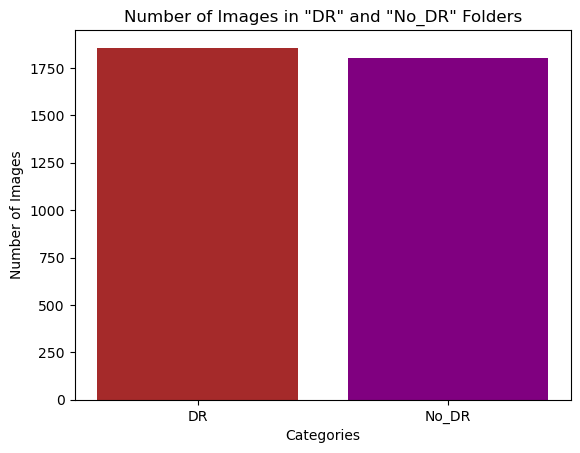

In [22]:
dr_folder = r"C:\Users\KIIT\Desktop\Diabetic_Retinopathy\colored_images\DR"
no_dr_folder = r"C:\Users\KIIT\Desktop\Diabetic_Retinopathy\colored_images\No_DR"
num_images_dr = len([f for f in os.listdir(dr_folder) if f.endswith('.jpg') or f.endswith('.png')])
num_images_no_dr = len([f for f in os.listdir(no_dr_folder) if f.endswith('.jpg') or f.endswith('.png')])
labels = ['DR', 'No_DR']
values = [num_images_dr, num_images_no_dr]
plt.bar(labels, values, color=['Brown', 'purple'])
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images in "DR" and "No_DR" Folders')
plt.show()

In [23]:
image_directory = r"C:\Users\KIIT\Desktop\Diabetic_Retinopathy\colored_images"
No_DR_images = os.listdir(os.path.join(image_directory, 'No_DR'))
DR_images = os.listdir(os.path.join(image_directory, 'DR'))
dataset = []
label = []

In [24]:
for i,image_name in enumerate(No_DR_images):
    if(image_name.split('.')[1]=='jpg'):
        image = Image.open(image_directory+'/No_DR/'+image_name)
        image = image.convert('RGB')
        img = image.resize((224,224))
        img = np.array(img)
        dataset.append(img)
        label.append(0)

In [25]:
print(len(label))

1805


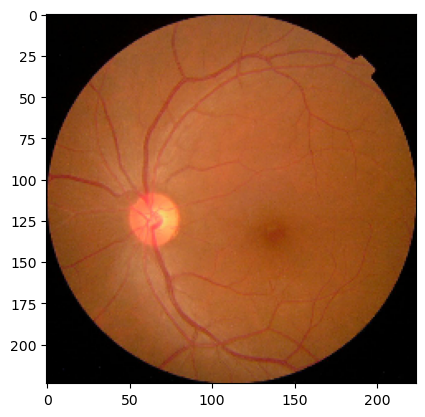

In [26]:
plt.imshow(dataset[0])

In [27]:
print(dataset[0].shape)

(224, 224, 3)


In [28]:
for i,image_name in enumerate(DR_images):
    if(image_name.split('.')[1]=='jpg'):
        image = Image.open(image_directory+'/DR/'+image_name)
        image = image.convert('RGB')
        img = image.resize((224,224))
        img = np.array(img)
        dataset.append(img)
        label.append(1)

Splitting the Dataset into Training and Testing

In [29]:
label = np.array(label)
dataset = np.array(dataset)

In [30]:
x_train,x_test,y_train,y_test = train_test_split(dataset,label,test_size=0.2,random_state=42,shuffle=True)

In [31]:
print(x_train.shape)

(2929, 224, 224, 3)


In [32]:
print(y_train.shape)

(2929,)


In [33]:
print(x_test.shape)

(733, 224, 224, 3)


Normalize the dataset

In [36]:
from keras.utils import normalize 
x_train=normalize(x_train,axis=1)
x_test=normalize(x_test,axis=1)

Model Building

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1))  
model.add(tf.keras.layers.Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=16, verbose=1, epochs=10, validation_data=(x_test, y_test), shuffle=False)
model.save('DiabeticRetinopathy10Epochs.h5')

Epoch 1/10
184/184 [==============================] - 42s 214ms/step - loss: 0.2986 - accuracy: 0.8737 - val_loss: 0.2632 - val_accuracy: 0.9004
Epoch 2/10
184/184 [==============================] - 37s 201ms/step - loss: 0.2405 - accuracy: 0.9071 - val_loss: 0.2419 - val_accuracy: 0.9004
Epoch 3/10
184/184 [==============================] - 36s 194ms/step - loss: 0.2252 - accuracy: 0.9099 - val_loss: 0.2546 - val_accuracy: 0.9004
Epoch 4/10
184/184 [==============================] - 35s 191ms/step - loss: 0.2135 - accuracy: 0.9075 - val_loss: 0.2331 - val_accuracy: 0.9018
Epoch 5/10
184/184 [==============================] - 35s 190ms/step - loss: 0.2042 - accuracy: 0.9225 - val_loss: 0.2224 - val_accuracy: 0.9113
Epoch 6/10
184/184 [==============================] - 35s 191ms/step - loss: 0.1994 - accuracy: 0.9280 - val_loss: 0.1971 - val_accuracy: 0.9154
Epoch 7/10
184/184 [==============================] - 36s 193ms/step - loss: 0.1791 - accuracy: 0.9290 - val_loss: 0.2041 - val_ac

Testing the Model

In [4]:
from keras.models import load_model
model_path = r"C:\Users\KIIT\Desktop\Diabetic_Retinopathy\DiabeticRetinopathy10Epochs.h5"
model = load_model(model_path)

In [8]:
image=cv2.imread(r"C:\Users\KIIT\Desktop\Diabetic_Retinopathy\Predict\pred19.jpg")
img=Image.fromarray(image)
img=img.resize((224,224))
img=np.array(img)
input_img=np.expand_dims(img,axis=0)

result=model.predict(input_img)
print(result)

1/1 [==============================] - 0s 63ms/step
[[1.]]
